In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import itertools
from pathlib import Path
from statistics import mean
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
Score_Genre_df = pd.read_csv("../../csv_file/Score_Genre_Earnings.csv")
Score_Genre_df = Score_Genre_df.set_index('Key')

# Empty columns need to be dropped after merge
# Trial and error of making DataFrames found that these four columns were all null
Score_Genre_df = Score_Genre_df.drop(['SHORT WAR', 'REALITY-TV', 'TALK-SHOW', 'GAME-SHOW'], axis=1)

Score_Genre_df.rename(columns = {"SCI-FI": "SCI_FI"}, inplace = True)
Score_Genre_df.head()

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,ACTION,DRAMA,SCI_FI,THRILLER,MYSTERY,HISTORY,...,HORROR,DOCUMENTARY,WESTERN,BIOGRAPHY,FAMILY,MUSIC,MUSICAL,FANTASY,WAR,NEWS
Key,,,,,,,,,,,,,,,,,,,,,
5,16.0,61.0,8.0,29.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,25.0,68.0,36.0,48.0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,36.0,75.0,81.0,62.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15,42.0,83.0,89.0,78.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
16,37.0,63.0,91.0,70.0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
# Grabbing all column names to see all genre names
# Then giving each genre its own DataFrame
for col in Score_Genre_df.columns:
    print(col)

Hidden_Gem_Score
IMDb_Score
Rotten_Tomatoes_Score
Metacritic_Score
ACTION
DRAMA
SCI_FI
THRILLER
MYSTERY
HISTORY
CRIME
ADVENTURE
ANIMATION
COMEDY
ROMANCE
SPORT
HORROR
DOCUMENTARY
WESTERN
BIOGRAPHY
FAMILY
MUSIC
MUSICAL
FANTASY
WAR
NEWS


In [4]:
# Action
Score_Genre_df_Action = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'ACTION'])
Score_Genre_df_Action = Score_Genre_df_Action[Score_Genre_df_Action['ACTION']!= 0]
Score_Genre_df_Action

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,ACTION
Key,,,,,
21,24.0,58.0,39.0,49.0,1
35,31.0,65.0,68.0,52.0,1
36,22.0,50.0,40.0,45.0,1
37,29.0,53.0,68.0,53.0,1
40,16.0,51.0,9.0,34.0,1
...,...,...,...,...,...
9379,43.0,74.0,76.0,63.0,1
9389,34.0,62.0,76.0,67.0,1
9406,32.0,67.0,68.0,55.0,1


In [5]:
# Set DataFrame to Action columns to lists for best fits
Action_IMDb_list = Score_Genre_df_Action['IMDb_Score'].tolist()
Action_Tomatoes_list = Score_Genre_df_Action['Rotten_Tomatoes_Score'].tolist()
Action_Metacritic_list = Score_Genre_df_Action['Metacritic_Score'].tolist()
Action_Hidden_Gem_list = Score_Genre_df_Action['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Action_IMDb_list, dtype=np.float64)
T = np.array(Action_Tomatoes_list, dtype=np.float64)
M = np.array(Action_Metacritic_list, dtype=np.float64)
H = np.array(Action_Hidden_Gem_list, dtype=np.float64)

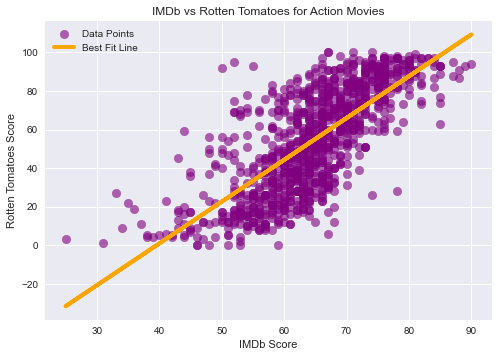

In [6]:
# IMDb vs. Rotten Tomatoes Action
# Create linear regression object
IMDb_Tomatoes_Action = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Action.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line_Tomatoes = IMDb_Tomatoes_Action.predict(I.reshape(-1,1))

# Code for making predictions
#IMDb_score = 30
#Rotten_Tomatoes_Score = IMDb_Tomatoes_Action.predict(np.array([[IMDb_score]]))[0]

# Commented out code above and below is for making predictions
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
#plt.scatter(IMDb_score,Rotten_Tomatoes_Score , label='Rotten Tomatoes Prediction',color='blue',s=100)
plt.plot(I,regression_line_Tomatoes,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Action Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

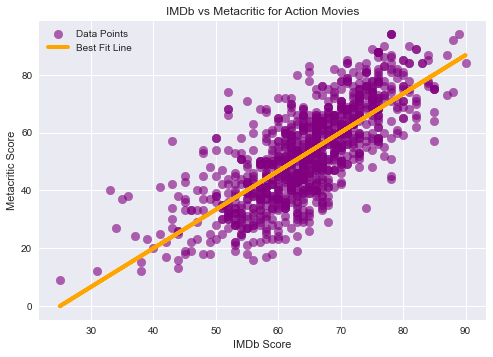

In [7]:
# IMDb vs. Metacritic Action
# Create linear regression object
IMDb_Metacritic_Action = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Action.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line_Metacritic = IMDb_Metacritic_Action.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line_Metacritic,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Action Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

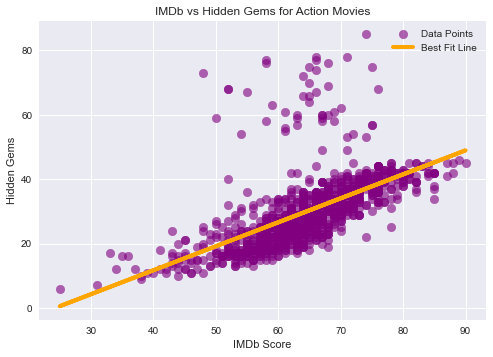

In [8]:
# IMDb vs. Hidden Gems Action
# Create linear regression object
IMDb_Hidden_Gems_Action = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Action.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line_Hidden = IMDb_Hidden_Gems_Action.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line_Hidden,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Action Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

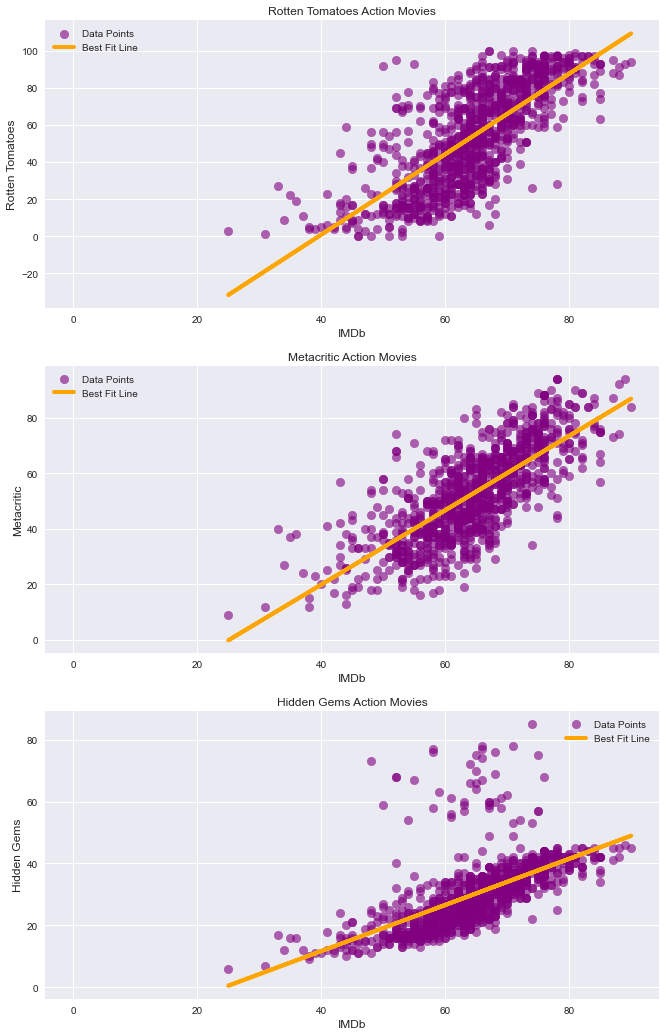

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.plot(0,0)
ax2.plot(0,1)
ax3.plot(0,2)

style.use('seaborn')
ax1.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
ax1.plot(I,regression_line_Tomatoes,label='Best Fit Line', color='orange',linewidth=4)
ax1.set_title('Rotten Tomatoes Action Movies')
ax1.set_xlabel('IMDb', fontsize='12')
ax1.set_ylabel('Rotten Tomatoes', fontsize='12')
ax1.legend()

style.use('seaborn')
ax2.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
ax2.plot(I,regression_line_Metacritic,label='Best Fit Line', color='orange',linewidth=4)
ax2.set_title('Metacritic Action Movies')
ax2.set_xlabel('IMDb', fontsize='12')
ax2.set_ylabel('Metacritic', fontsize='12')
ax2.legend()

style.use('seaborn')
ax3.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
ax3.plot(I,regression_line_Hidden,label='Best Fit Line', color='orange',linewidth=4)
ax3.set_title('Hidden Gems Action Movies')
ax3.set_xlabel('IMDb', fontsize='12')
ax3.set_ylabel('Hidden Gems', fontsize='12')
ax3.legend()

fig.set_figwidth(11)
fig.set_figheight(18)